In [2]:
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import least_squares
from scipy.optimize import dual_annealing
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt
import pandas as pd
from scipy import spatial
from tqdm import tqdm

In [3]:
size = 1000
X = np.array([3 * i / size for i in range(size)])
X[:2]

array([0.   , 0.003])

In [4]:
def function(x):
    return 1 / (x ** 2 - 3 * x + 2)

In [5]:
def noisy_y(x, func):
    if func(x) < - 100:
        return -100 + np.random.normal(0, 1)
    if func(x) > 100:
        return 100 + np.random.normal(0, 1)
    else:
        return func(x) + np.random.normal(0, 1)

In [6]:
Y = np.array([noisy_y(x, function) for x in X])
Y[:2]

array([0.72937603, 0.0972191 ])

In [7]:
def rational(params, x):
    a, b, c, d = params
    return (a * x + b) / (x ** 2 + c * x + d)

In [8]:
def approximate(params, x, y, func):
    return np.sum( (func(params, x) - y) ** 2 )

In [9]:
# tmp = lambda pa: approximate(a,b,c,d)
nm_coefs = minimize(approximate, x0=(0, 1, 3, 2), args=(X, Y, rational,), method='Nelder-Mead')
nm_coefs

 final_simplex: (array([[ 0.02356841, -0.02044421, -1.97976184,  0.97988921],
       [ 0.02356841, -0.02044396, -1.97976078,  0.97988816],
       [ 0.02356841, -0.02044434, -1.97976117,  0.97988854],
       [ 0.02356841, -0.02044381, -1.97976151,  0.97988889],
       [ 0.02356841, -0.02044372, -1.97976016,  0.97988755]]), array([237120.56765736, 237120.56772044, 237120.56773084, 237120.5677458 ,
       237120.5677561 ]))
           fun: 237120.56765735504
       message: 'Optimization terminated successfully.'
          nfev: 673
           nit: 392
        status: 0
       success: True
             x: array([ 0.02356841, -0.02044421, -1.97976184,  0.97988921])

In [10]:
lm_coefs = least_squares(approximate, x0=(0, 1, 3, 2), args=(X, Y, rational), max_nfev=1000)
lm_coefs

 active_mask: array([0., 0., 0., 0.])
        cost: 33236126376.133797
         fun: array([257822.13394561])
        grad: array([-3.37297312e+09,  3.21527974e+09, -4.33571096e+09, -3.77716978e+09])
         jac: array([[-13082.55836484,  12470.92205088, -16816.67470023,
        -14650.29292036]])
     message: 'The maximum number of function evaluations is exceeded.'
        nfev: 1000
        njev: 961
  optimality: 4335710957.083483
      status: 0
     success: False
           x: array([-3.63406154,  3.63935758, -2.00633033,  1.01020857])

In [12]:
da = dual_annealing(approximate, x0=(0, 1, 3, 2), args=(X, Y, rational), bounds=((-10, 10), (-10, 10), (-10, 10), (-10, 10)))
da

     fun: 137223.1904999872
 message: ['Maximum number of iteration reached']
    nfev: 9156
    nhev: 0
     nit: 1000
    njev: 231
  status: 0
 success: True
       x: array([-1.00676488,  1.00725133, -2.0009314 ,  1.00094768])

In [17]:
de = differential_evolution(approximate, x0=(0, 1, 3, 2), args=(X, Y, rational), bounds=((-10, 10), (-10, 10), (-10, 10), (-10, 10)))
de

     fun: 137223.19184645594
     jac: array([ -2076.82607095,  -2075.62408274, 271614.75319644, 273137.38412447])
 message: 'Optimization terminated successfully.'
    nfev: 1175
     nit: 5
 success: True
       x: array([-1.00675252,  1.0072393 , -2.00093267,  1.00094895])

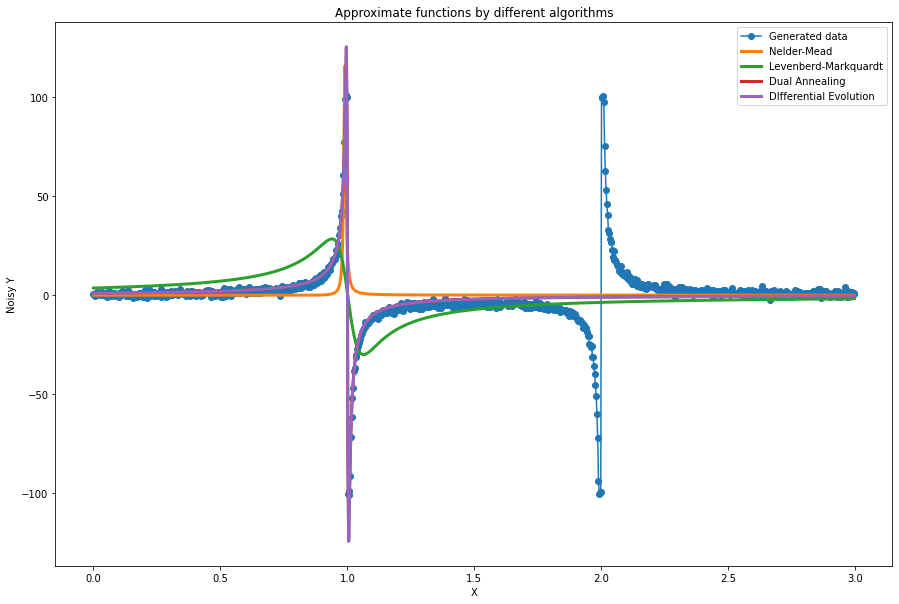

In [18]:
plt.figure(figsize=(15, 10))
plt.plot(X, Y, '-o', label='Generated data')
plt.plot(X, rational(nm_coefs.x, X), label='Nelder-Mead', linewidth=3)
plt.plot(X, rational(lm_coefs.x, X), label='Levenberd-Markquardt', linewidth=3)
plt.plot(X, rational(da.x, X), label='Dual Annealing', linewidth=3)
plt.plot(X, rational(de.x, X), label='DIfferential Evolution', linewidth=3)
plt.title('Approximate functions by different algorithms')
plt.xlabel('X')
plt.ylabel('Noisy Y')
plt.legend()
plt.savefig('../Pictures/task4_Linear_approx_grad_d', bbox_inches='tight')
plt.show()

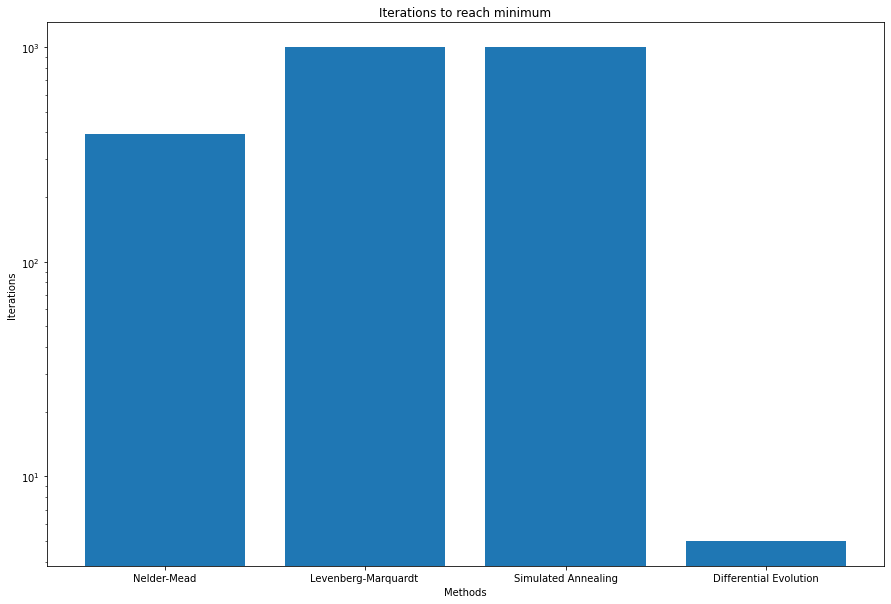

In [20]:
plt.figure(figsize=(15, 10))
x = ["Nelder-Mead", "Levenberg-Marquardt ", "Simulated Annealing", "Differential Evolution"]
y = [392, 1000, 1000, 5]
plt.bar(x,y)
plt.title('Iterations to reach minimum')
plt.xlabel('Methods')
plt.ylabel('Iterations')
plt.yscale('log')
plt.savefig('../Pictures/task4_1_iterations', bbox_inches='tight')
plt.show()

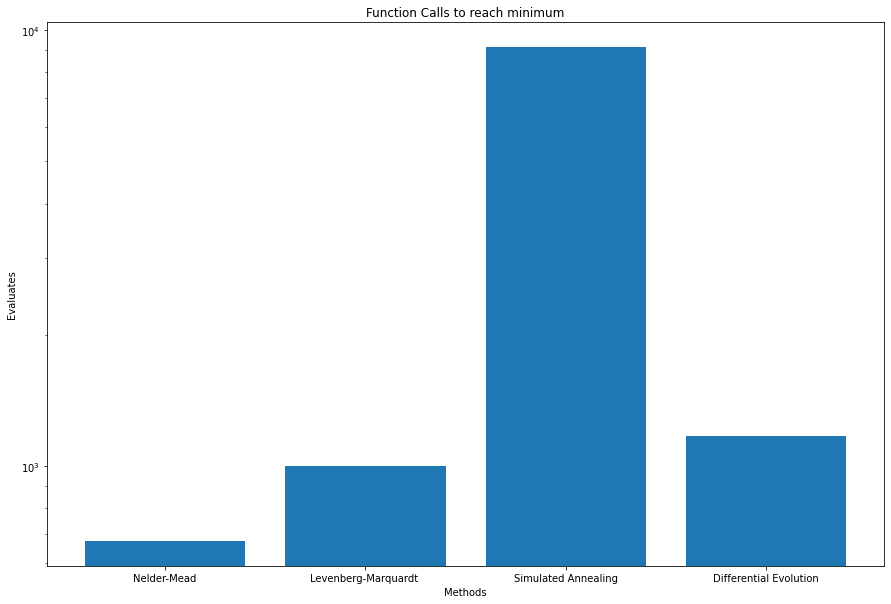

In [22]:
plt.figure(figsize=(15, 10))
x = ["Nelder-Mead", "Levenberg-Marquardt ", "Simulated Annealing", "Differential Evolution"]
y = [673, 1000, 9156, 1175]
plt.bar(x,y)
plt.title('Function Calls to reach minimum')
plt.xlabel('Methods')
plt.ylabel('Evaluates')
plt.yscale('log')
plt.savefig('../Pictures/task4_1_feval', bbox_inches='tight')
plt.show()

## Task 2

In [285]:
cities_coords = []
with open("./wg22_xy.txt", "r") as file:
    lines = file.readlines()
    for line in lines[2:-1]:
        cities_coords.append([float(s) for s in line.strip().split(" ") if s != ""])
cities_coords = np.array(cities_coords)

In [286]:
cities_coords

array([[-57.,  28.],
       [ 54., -65.],
       [ 46.,  79.],
       [  8., 111.],
       [-36.,  52.],
       [-22., -76.],
       [ 34., 129.],
       [ 74.,   6.],
       [ -6., -41.],
       [ 21.,  45.],
       [ 37., 155.],
       [-38.,  35.],
       [ -5., -24.],
       [ 70., -74.],
       [ 59., -26.],
       [114., -56.],
       [ 83., -41.],
       [-40., -28.],
       [ 21., -12.],
       [  0.,  71.],
       [ 50., 140.],
       [-20.,  70.]])

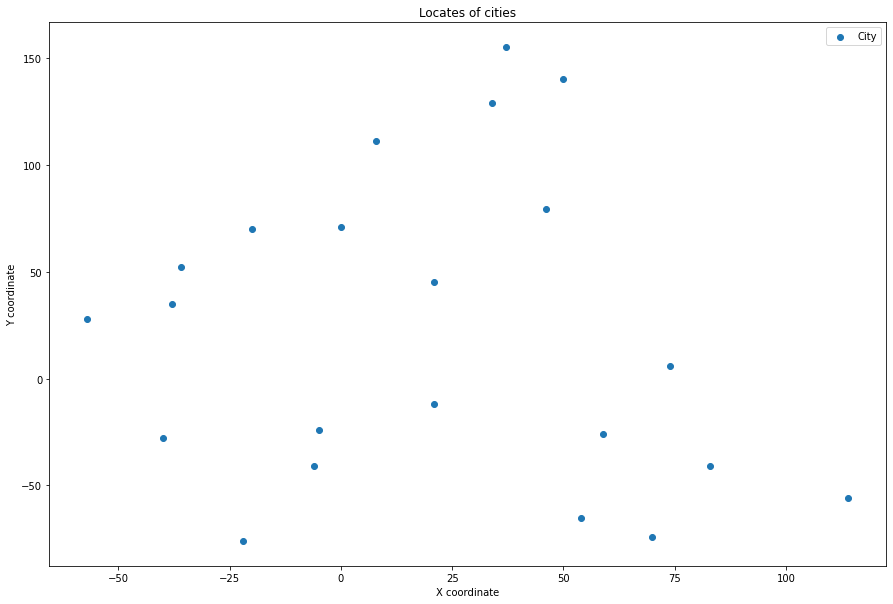

In [431]:
plt.figure(figsize=(15, 10))
plt.scatter(cities_coords[:, 0], cities_coords[:, 1], label='City')
plt.title('Locates of cities')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.legend()
plt.savefig('./Pictures/task4_initial_distances_matrix', bbox_inches='tight')
plt.show()

In [294]:
data = spatial.distance.squareform(spatial.distance.pdist(cities_coords))
data

array([[  0.        , 144.81022063, 114.93476411, 105.42295765,
         31.89043744, 109.73149047, 135.94851967, 132.83448347,
         85.80209788,  79.83107165, 158.00316453,  20.24845673,
         73.53910524, 162.88953312, 127.95311641, 190.51771571,
        156.08010764,  58.52349955,  87.658428  ,  71.40028011,
        154.8967398 ,  55.97320788],
       [144.81022063,   0.        , 144.22205102, 181.91206667,
        147.6109752 ,  76.79192666, 195.02820309,  73.76313442,
         64.62197769, 114.8433716 , 220.65584062, 135.88230201,
         71.84705979,  18.35755975,  39.3192065 ,  60.67124525,
         37.64306045, 101.01980004,  62.43396512, 146.32839779,
        205.03902068, 153.951291  ],
       [114.93476411, 144.22205102,   0.        ,  49.67896939,
         86.33075929, 169.26015479,  51.41984053,  78.18567644,
        130.78226179,  42.20189569,  76.53103945,  94.82615673,
        114.93476411, 154.87091399, 105.80170131, 151.15885684,
        125.57467898, 137.2770

In [477]:
def main_dist(data, max_temperature = 30_000):
    sequence = np.arange(1, len(data), 1)
    np.random.shuffle(sequence)
    best_way = np.inf
    old_sequence = sequence.copy()
    temperature = np.flip(np.arange(0.00001, max_temperature, 0.00005 ))
    for iter in tqdm(temperature):
        mask = np.random.randint(low=0, high=len(data)-1, size=2)
        sequence[mask[0]], sequence[mask[1]] = sequence[mask[1]], sequence[mask[0]]
        for idx, val in enumerate(sequence):
            if idx == 0:
                dist = data[0, val]
            else:
                dist += data[sequence[idx-1], val]
        dist += data[val, 0] # так как задача замкнутая
        if iter == temperature[0]:
            first_iter = sequence.copy()
            first_dist = dist
        if (dist < best_way) or ((dist > best_way) and ( np.exp( -1 * (dist - best_way) / iter ) > np.random.rand() )):
            best_way = dist
            old_sequence = sequence.copy()
        else:
            sequence = old_sequence.copy()
    first_iter = np.append(0, first_iter)
    first_iter = np.append(first_iter, 0)
    old_sequence = np.append(0, old_sequence)
    old_sequence = np.append(old_sequence, 0)
    return ({'fist_seq': first_iter, 'first_dist': first_dist, 'opt_seq': old_sequence, 'opt_dist': dist})



In [478]:
aa = main_dist(data, max_temperature = 1000)

100%|██████████| 20000000/20000000 [08:38<00:00, 38547.95it/s]


In [479]:
aa

{'fist_seq': array([ 0, 11, 10, 16, 12, 18,  5,  7, 13,  2, 20, 17,  3,  6, 19, 15,  1,
         9, 21,  8,  4, 14,  0]),
 'first_dist': 2271.9686208498056,
 'opt_seq': array([ 0,  4, 21, 19,  3,  6, 10, 20,  2,  9,  7, 16, 15, 13,  1, 14, 18,
        12,  8,  5, 17, 11,  0]),
 'opt_dist': 810.2695603846236}

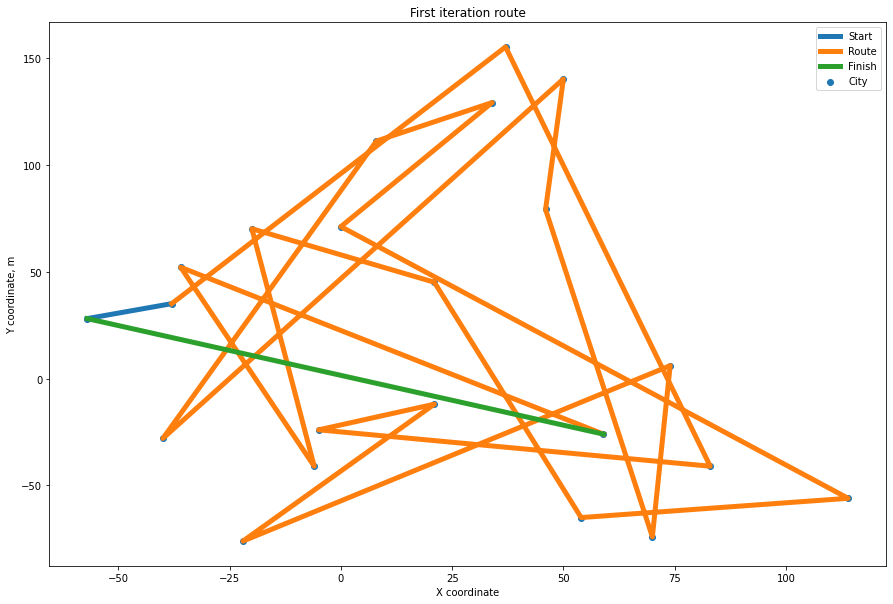

In [481]:
plt.figure(figsize=(15, 10))
plt.scatter(cities_coords[:, 0], cities_coords[:, 1], label='City')
plt.plot([cities_coords[x, 0] for x in aa['fist_seq'][:2]], [cities_coords[x, 1] for x in aa['fist_seq'][:2]], label='Start', linewidth=5)
plt.plot([cities_coords[x, 0] for x in aa['fist_seq'][1:-1]], [cities_coords[x, 1] for x in aa['fist_seq'][1:-1]], label='Route', linewidth=5)
plt.plot([cities_coords[x, 0] for x in aa['fist_seq'][-2:]], [cities_coords[x, 1] for x in aa['fist_seq'][-2:]], label='Finish', linewidth=5)
plt.title('First iteration route')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate, m')
plt.legend()
plt.savefig('./Pictures/task4_distance_first_iteration', bbox_inches='tight')
plt.show()

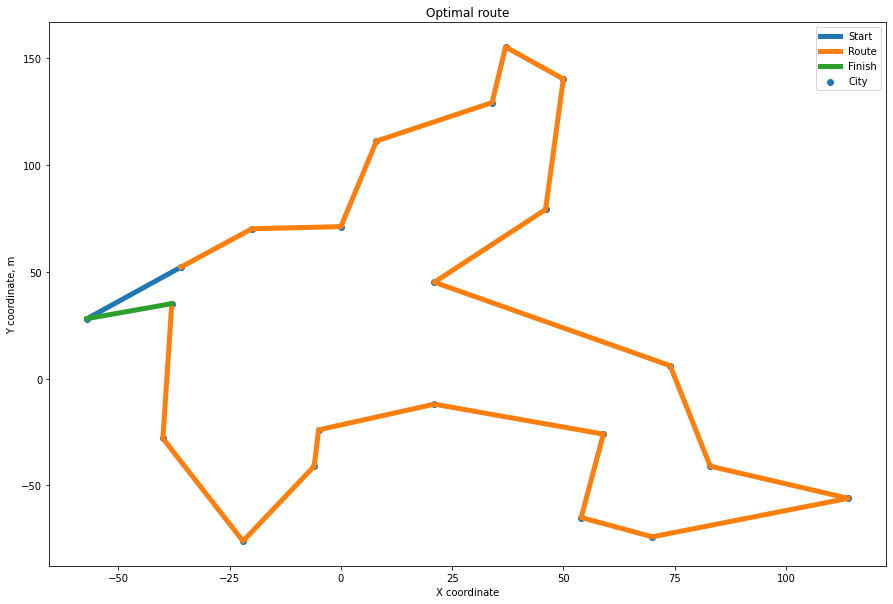

In [482]:
plt.figure(figsize=(15, 10))
plt.scatter(cities_coords[:, 0], cities_coords[:, 1], label='City')
plt.plot([cities_coords[x, 0] for x in aa['opt_seq'][:2]], [cities_coords[x, 1] for x in aa['opt_seq'][:2]], label='Start', linewidth=5)
plt.plot([cities_coords[x, 0] for x in aa['opt_seq'][1:-1]], [cities_coords[x, 1] for x in aa['opt_seq'][1:-1]], label='Route', linewidth=5)
plt.plot([cities_coords[x, 0] for x in aa['opt_seq'][-2:]], [cities_coords[x, 1] for x in aa['opt_seq'][-2:]], label='Finish', linewidth=5)
plt.title('Optimal route')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate, m')
plt.legend()
plt.savefig('./Pictures/task4_distance_finish_iteration', bbox_inches='tight')
plt.show()